# Monte Carlo and Jet Tutorial

By Alexander Chkodrov  

In [22]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## 3 Monte Carlo Simulation Basics

generate random numbers between 5 and 15 and create a histogram

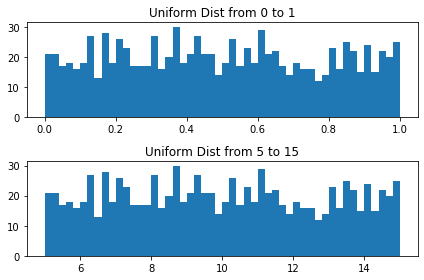

In [47]:
dist = np.array([random.random() for i in range(0,1000)])
modified_dist = np.add(np.multiply(dist,10), 5)
fig, axs = plt.subplots(2, 1, tight_layout=True)
axs[0].hist(dist, bins=50)
axs[0].set_title("Uniform Dist from 0 to 1")
axs[1].hist(modified_dist, bins=50)
axs[1].set_title("Uniform Dist from 5 to 15")
plt.show()

The uniform distribution ranging from 5 to 15 has a mean of 10 and 5 times the variance of the distribution ranging from 0 to 1

### 3.2 Accept-Reject Monte Carlo

generate Gaussian distributed random numbers with a mean $\mu$ of 5 and a width $\sigma$ of 2 in the range of \[0,10\] using only random.random(), the uniform distribution from \[0,1\], to generate random numbers.

In [152]:
from scipy import stats
from scipy.special import erfinv

In [156]:
def gaussian_pdf(x, mu, sigma):
    pdf = [(1.0/(sigma*math.sqrt(2*math.pi))) * math.exp((-1.0/2.0)*math.pow((i - mu)/sigma,2)) for i in x]
    return pdf

def norm_ppt(probs, mu, sigma):
    # F^(-1)(p) is the inverse CDF or the quantile function for gaussian distribution with mean mu and std. dev. sigma
    # erf^(-1)(x) = erfinv(x) is the inverse error function
    # x = F^(-1)(p) = mu + sigma*sqrt(2)*erfinv(2p-1), or x = stats.norm.ppf(probs, loc=mu, scale=sigma)
    x = [mu + sigma*math.sqrt(2)*erfinv(2*p-1) for p in probs]
    return x

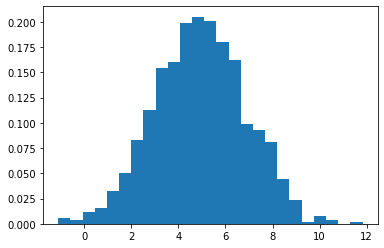

In [161]:
#x = np.linspace(-5, 15, 1000)
#pdf = gaussian(x, 5, 2)
#plt.plot(x, pdf)

n_variables = 1000

p = [random.random() for i in range(0,n_variables)]
rvs = norm_ppt(p, mu=5, sigma=2)
plt.hist(rvs, density=True, bins=25)

plt.show()

The error function $erf(x) = \frac{1}{\sqrt{\pi}}\int_{-x}^{x}e^{-t^2}dt$ has no analytical solution and neither does the inverse $erf^{-1}(x)$. The inverse error function can be approximated by many numerical methods, and the effort to find faster/more accurate approximations continues today. Using the inverse error function, the quantile function $F^{-1}(x)$ for a Gaussian distribution can be calculated. The quantile function maps probabilities to values, and given a uniform distribution $U$ ranging from \[0,1\] the quantile function can be used to tranform the distribution into a Gaussian distribution $X$ by the equation $$X = F^{-1}(U)$$ or equivalently, $$X = \mu + \sigma\sqrt{2} erf^{-1}(2U - 1),\text{ where }U \in (0, 1)$$

##### Accept-Reject Method

Using the accept-reject method, calculate the value of pi. Do this by drawing a circle of diameter 1 enclosed by a square of length 1, generating 1000 points to fall within the square shaped region, and calculating based on the area of each region the value of pi.